# Classification Errors

Now that we've started discussing classification, it's time to examine comparing our models to each other and choosing models of best fit. Previously in regression, we've been predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm.  
  
$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df[['age', 'sex', 'cp','trestbps','chol']]
y = df.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## 2. Create a standard logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [24]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [49]:
import pandas as pd
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [66]:
y_test.head()

163    1
234    0
208    0
216    0
37     1
Name: target, dtype: int64

In [69]:
y_hat_test[2]

1

## 3. Write a function to calculate the precision

In [82]:
from sklearn import metrics

In [86]:
# save confusion matrix and slice into four pieces
confusion_test = metrics.confusion_matrix(y_test, y_hat_test)
print(confusion)
TP = confusion_test[1, 1]
TN = confusion_test[0, 0]
FP = confusion_test[0, 1]
FN = confusion_test[1, 0]

[[18  9]
 [10 39]]


In [72]:
def precision(y_hat, y):
    positive_predicted = sum(y_hat)
    both =list(zip(y_hat, y))
    true_positive = sum([1 for item in both if item[0] == 1 and item[1] ==1])
    return true_positive/positive_predicted

In [87]:
#precision 
TP/(TP+FP)

0.8125

## 4. Write a function to calculate the recall

In [88]:
#recall
TP/(TP+FN)

0.7959183673469388

In [77]:
def recall(y_hat, y):
    true_positive = sum([1 for item in both if item[0] == 1 and item[1] ==1])
    actual_positive = sum(y)
    return true_positive/actual_positive

In [78]:
recall(y_hat_test, y_test)

0.7959183673469388

In [79]:
# def recall2(y_hat, y):
#     #Could also use confusion matrix
#     y_y_hat = list(zip(y, y_hat))
#     tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
#     fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
#     return tp/float(tp+fn)

## 5. Write a function to calculate the accuracy

In [91]:
# def accuracy(y_hat, y):
#     #Could also use confusion matrix
#     y_y_hat = list(zip(y, y_hat))
#     tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
#     tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
#     return (tp+tn)/float(len(y_hat))

In [92]:
accuracy(y_hat_test,y_test)

0.75

In [ ]:
def accuracy(y_hat, y):
    #Your code here

In [93]:
#accuracy
(TP+TN)/(TP+TN+FP+FN)

0.75

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [106]:
# save confusion matrix and slice into four pieces
def confusion_metrics(y, y_hat):
    confusion_test = metrics.confusion_matrix(y, y_hat)
#     print(confusion_test)
    TP = confusion_test[1, 1]
    TN = confusion_test[0, 0]
    FP = confusion_test[0, 1]
    FN = confusion_test[1, 0]
    #accuracy
    acc = (TP+TN)/(TP+TN+FP+FN)
    #recall
    recall = (TP)/(TP+FN)
    #precision 
    precision = (TP)/(TP+FP)
    return acc, recall, precision

In [107]:
test_acc, test_recall, test_precision = confusion_metrics(y_test, y_hat_test)

In [111]:
train_acc, train_recall, train_precision = confusion_metrics(y_train, y_hat_train)

## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [114]:
import  matplotlib.pyplot as plt
%matplotlib inline

In [115]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    
    test_acc, test_recall, test_precision = confusion_metrics(y_test, y_hat_test)
    train_acc, train_recall, train_precision = confusion_metrics(y_train, y_hat_train)
    training_Precision.append(train_precision)
    testing_Precision.append(test_precision)
    training_Recall.append(train_recall)
    testing_Recall.append(test_recall)
    training_Accuracy.append(train_acc)
    testing_Accuracy.append(test_acc)
# 6 lines of code here

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

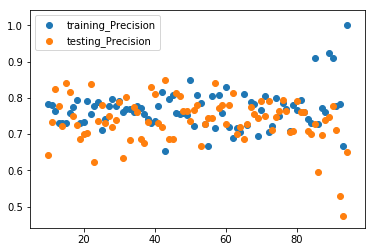

In [116]:
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend()


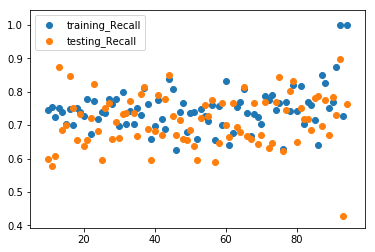

In [117]:
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

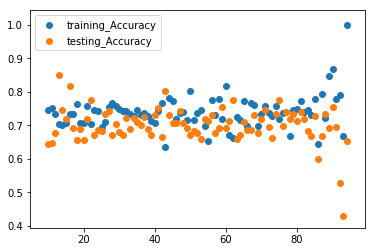

In [118]:
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()